In [1]:


# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score







In [2]:
df_auto = pd.read_csv('CarPrice_Assignment.csv')
df_auto = df_auto.drop('car_ID',axis=1)
df_auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [3]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [4]:
df_auto.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [5]:
# Extracting Car Company from the CarName as per direction in Problem 

df_auto['CarName'] = df_auto['CarName'].str.split(' ',expand=True)

In [6]:
# Renaming the typo errors in Car Company names

df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [7]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df_auto['symboling'] = df_auto['symboling'].astype(str)

<Figure size 1440x432 with 0 Axes>

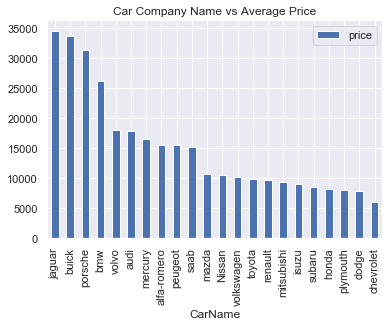

In [8]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df_auto.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [10]:
df_auto['cylindernumber'].value_counts()

four      159
six       24 
five      11 
eight     5  
two       4  
three     1  
twelve    1  
Name: cylindernumber, dtype: int64

In [11]:
df_auto['cylinder_level'] = ''

df_auto.loc[df_auto['cylindernumber'].isin('eight', 'twelve'), 'cylinder_level'] = 'eight+'
df_auto.loc[df_auto['cylindernumber'].isin('five', 'six'), 'cylinder_level'] = 'five/six'
df_auto.loc[df_auto['cylindernumber'].isin('two', 'three'), 'cylinder_level'] = '<four'
df_auto.loc[df_auto['cylindernumber'].isin('four'), 'cylinder_level'] = 'four'

df_auto['cylinder_level'].value_counts()


TypeError: isin() takes 2 positional arguments but 3 were given

In [9]:
high_brand = df_autox[df_autox['price'] > 20000].index
low_brand = df_autox[df_autox['price'] < 12000].index
med_brand = df_autox[(df_autox['price'] <= 20000) & (df_autox['price'] >= 12000)].index

df_auto['brand_tier'] = ''

df_auto.loc[df_auto['CarName'].isin(high_brand), 'brand_tier'] = 'high'
df_auto.loc[df_auto['CarName'].isin(med_brand), 'brand_tier'] = 'med'
df_auto.loc[df_auto['CarName'].isin(low_brand), 'brand_tier'] = 'low'
df_auto['brand_tier'].value_counts()

low     142
med     39 
high    24 
Name: brand_tier, dtype: int64

In [10]:
## we wnat to add in average mpg here as well

# perhaps adding interaction terms

df_auto['avg_mpg'] = (df_auto['citympg'] + df_auto['highwaympg'])/2
df_auto['log_price'] = np.log(df_auto['price'])


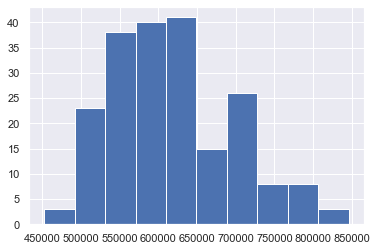

In [11]:
df_auto['carvolume'] = df_auto['carlength'] * df_auto['carwidth'] * df_auto['carheight']
df_auto['carvolume'].hist()

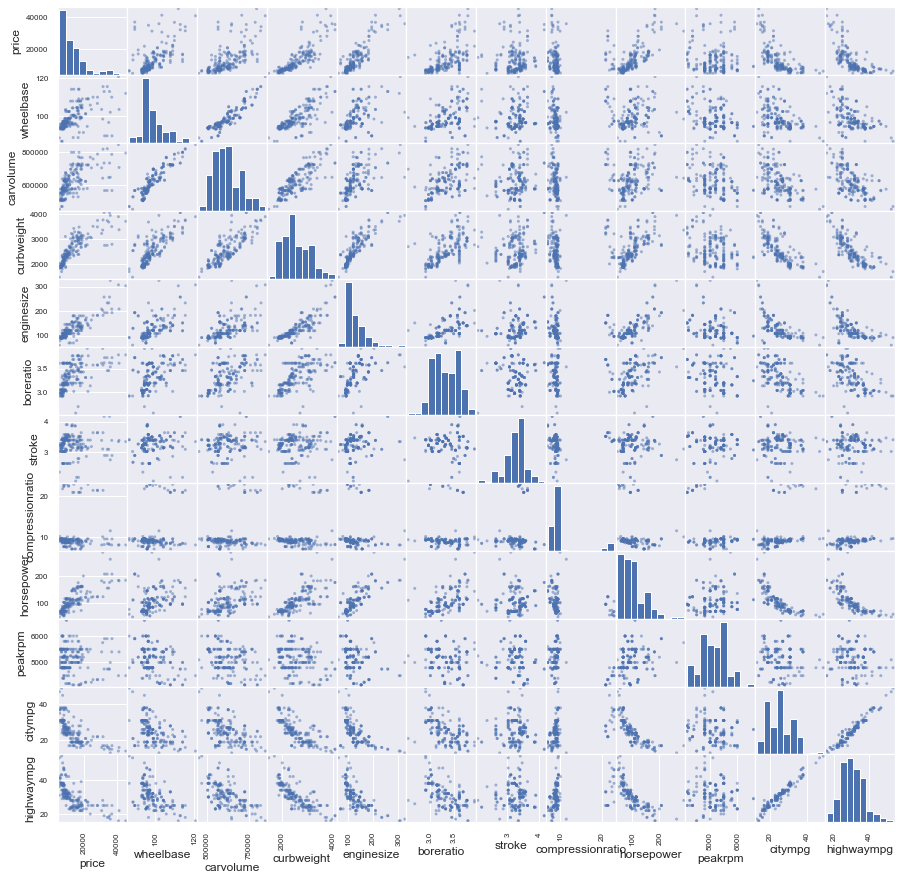

In [12]:
pd.plotting.scatter_matrix(df_auto[['price', 'wheelbase', 'carvolume', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']], figsize = (15, 15), diagonal = 'hist');

### Going to scale the data here, just going to start by standardizing

### Going to scale the data here, just going to start by standardizing

In [13]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_auto.select_dtypes(include=['object']).columns.tolist()
num_col = df_auto.select_dtypes(exclude=['object']).columns.tolist()
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

In [14]:
num_col

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'avg_mpg',
 'log_price',
 'carvolume']

In [15]:
scaler = preprocessing.StandardScaler()
df_std = df_auto.copy()
df_std[num_col] = scaler.fit_transform(df_std[num_col])

In [17]:
# save standardized dataframe for now 


# uncomment here to save
# df_std.to_csv('standardized_cardata.csv')
df_std.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_tier,avg_mpg,log_price,carvolume
0,3,alfa-romero,gas,std,two,convertible,rwd,front,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,dohc,four,0.0744,mpfi,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.0274,med,-0.5993,0.3092,-1.1442
1,3,alfa-romero,gas,std,two,convertible,rwd,front,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,dohc,four,0.0744,mpfi,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.4045,med,-0.5993,0.7092,-1.1442
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,-0.7086,-0.2315,-0.1906,-0.5435,0.5149,ohcv,six,0.6040,mpfi,-2.4049,0.6859,-0.2883,1.2645,-0.2630,-0.9530,-0.6916,0.4045,med,-0.8249,0.7092,-0.3927
3,2,audi,gas,std,four,sedan,fwd,front,0.1737,0.2073,0.1365,0.2359,-0.4208,ohc,four,-0.4311,mpfi,-0.5173,0.4622,-0.0360,-0.0537,0.7879,-0.1869,-0.1094,0.0845,med,-0.1482,0.3752,0.2031
4,2,audi,gas,std,four,sedan,4wd,front,0.1071,0.2073,0.2300,0.2359,0.5168,ohc,five,0.2189,mpfi,-0.5173,0.4622,-0.5407,0.2759,0.7879,-1.1062,-1.2739,0.5237,med,-1.2009,0.8206,0.2273


### Some more viz and EDA 

In [17]:
# added try/except handling bc of errors if run multiple times

try:
    num_col.remove('log_price')
    num_col.remove('highwaympg')
    num_col.remove('citympg')
    num_col.remove('carlength')
    num_col.remove('carheight')
    num_col.remove('carwidth')
except:
    pass
print(num_col)

['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price', 'avg_mpg', 'carvolume']


IndexError: index 3 is out of bounds for axis 0 with size 3

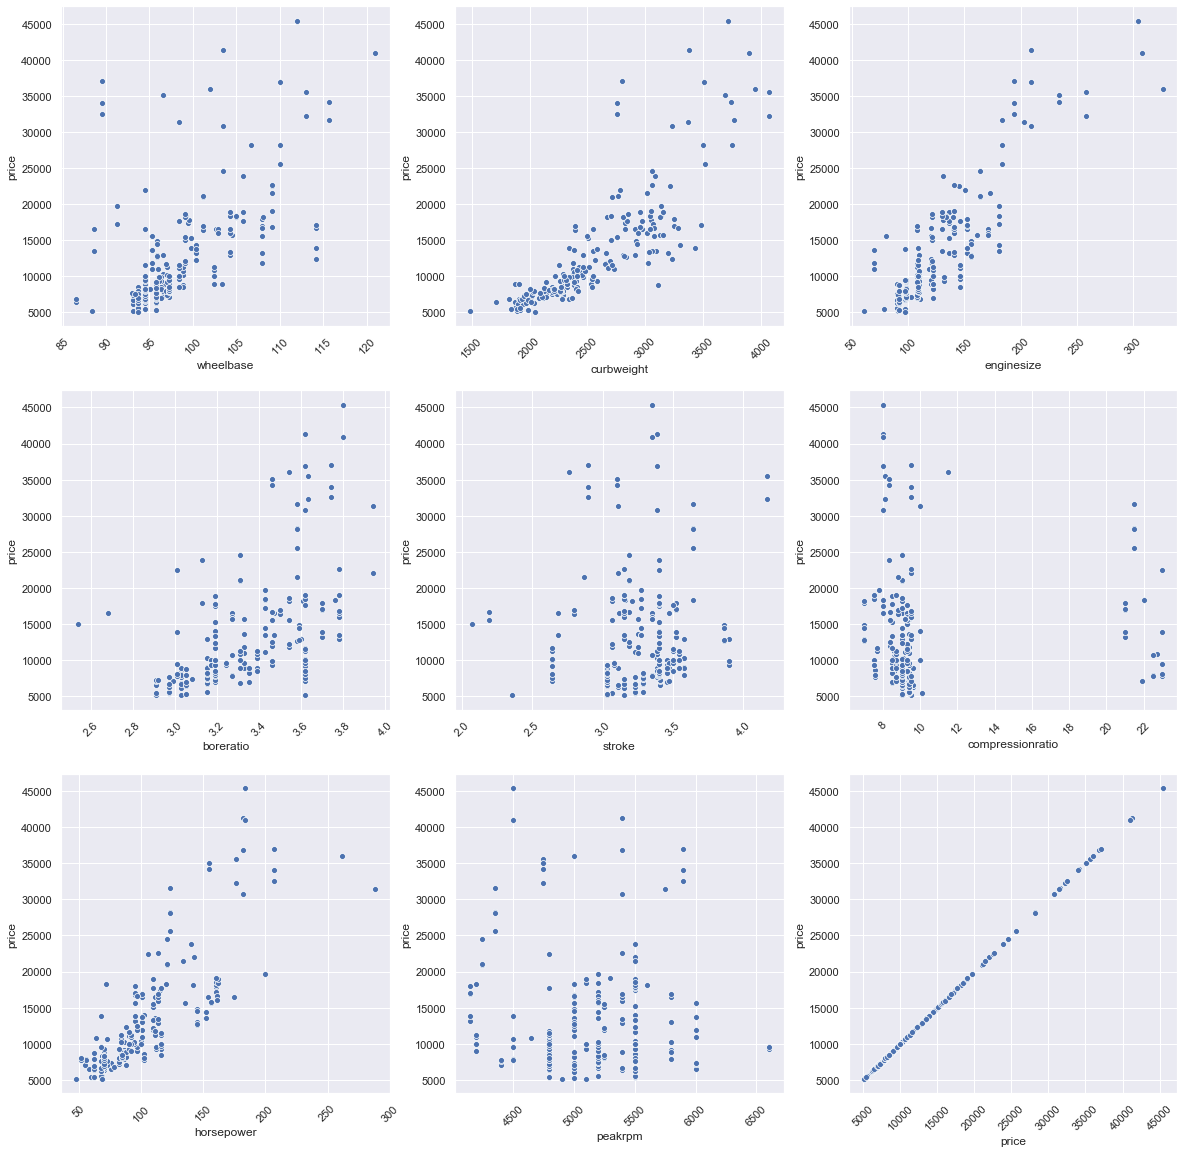

In [18]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(int(len(num_col)/3),3,figsize=(20,20)) # might need to add a +1 here to the len subplot if # of vars changes
for seg,col in enumerate(num_col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df_auto, ax=axes[x,y]) # this throws an error but graph shows up
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

### going to create dummy variables for model fitting
going to just work with std dataframe for now

In [19]:
cat_col

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand_tier']

In [20]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df_std[cat_col])
dummies.shape

(205, 69)

In [21]:
dummies = pd.get_dummies(df_std[cat_col], drop_first = True)
dummies.shape

(205, 57)

In [22]:
# Add the results to the original dataframe

df_std = pd.concat([df_std, dummies], axis = 1)
df_std.shape

(205, 86)

In [23]:
# Drop the original cat variables as dummies are already created

df_std.drop( cat_col, axis = 1, inplace = True)
df_std.shape

(205, 74)

In [24]:
df_std.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avg_mpg,log_price,carvolume,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_tier_low,brand_tier_med
0,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.0274,-0.5993,0.3092,-1.1442,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,0.0744,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.4045,-0.5993,0.7092,-1.1442,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,-0.7086,-0.2315,-0.1906,-0.5435,0.5149,0.6040,-2.4049,0.6859,-0.2883,1.2645,-0.2630,-0.9530,-0.6916,0.4045,-0.8249,0.7092,-0.3927,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.1737,0.2073,0.1365,0.2359,-0.4208,-0.4311,-0.5173,0.4622,-0.0360,-0.0537,0.7879,-0.1869,-0.1094,0.0845,-0.1482,0.3752,0.2031,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.1071,0.2073,0.2300,0.2359,0.5168,0.2189,-0.5173,0.4622,-0.5407,0.2759,0.7879,-1.1062,-1.2739,0.5237,-1.2009,0.8206,0.2273,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### Train Test Split

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_std, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train.pop('price')
X_train = df_train

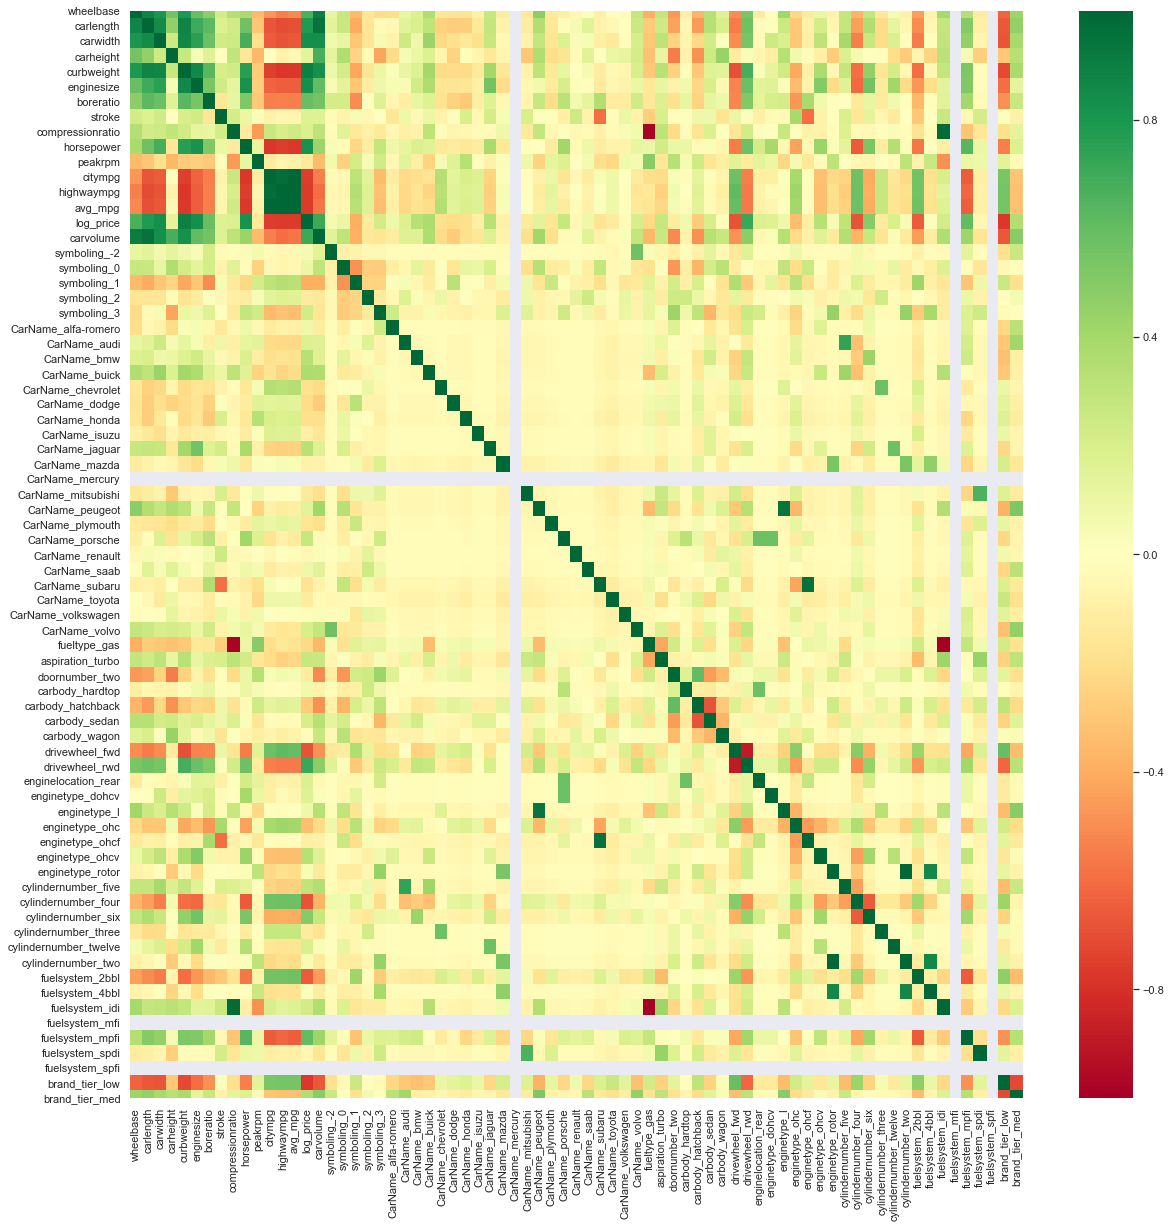

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

In [27]:
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'avg_mpg', 'log_price', 'carvolume',
       'symboling_-2', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'CarName_alfa-romero', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'engine

## Model Fitting

In [63]:
X_train_1 = X_train['horsepower']

In [64]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [65]:
# Check parameters created

lr_1.params

const        0.0035
horsepower   0.7843
dtype: float64

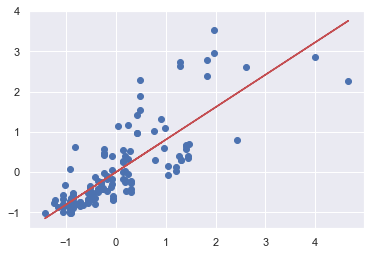

In [66]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [67]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           6.04e-34
Time:                        19:56:20   Log-Likelihood:                -124.42
No. Observations:                 143   AIC:                             252.8
Df Residuals:                     141   BIC:                             258.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.049      0.071      0.9

#### Let's do a car description model fit
Will include:
- car name
- body of car
- car volume
- curb weight

In [74]:
X_train_desc = X_train[['CarName_alfa-romero', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'curbweight', 'carvolume']]

# Add a constant
X_train_descc = sm.add_constant(X_train_desc)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_descc).fit()

# Check parameters created

print(lr_1.params)

# Let's visualise the data with a scatter plot and the fitted regression line

# plt.scatter(X_train_descc.iloc[:, 1], y_train)
# plt.plot(X_train_descc.iloc[:, 1], 0.8062*X_train_descc.iloc[:, 1], 'r')
# plt.show()

# Print a summary of the linear regression model obtained
print(lr_1.summary())

const                 0.1681 
CarName_alfa-romero   0.0649 
CarName_audi          0.4239 
CarName_bmw           1.3479 
CarName_buick         0.9726 
CarName_chevrolet     0.1541 
CarName_dodge         -0.0396
CarName_honda         0.0283 
CarName_isuzu         0.0950 
CarName_jaguar        0.9998 
CarName_mazda         0.1019 
CarName_mercury       -0.0000
CarName_mitsubishi    -0.2123
CarName_peugeot       -0.2959
CarName_plymouth      -0.0826
CarName_porsche       1.4795 
CarName_renault       -0.1868
CarName_saab          0.1763 
CarName_subaru        -0.1067
CarName_toyota        -0.1553
CarName_volkswagen    0.0479 
CarName_volvo         0.3224 
carbody_hardtop       0.0308 
carbody_hatchback     -0.2932
carbody_sedan         -0.2973
carbody_wagon         -0.4903
curbweight            0.6532 
carvolume             -0.0422
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                

We obviously want to refine this as most of these coefficients are not significant. Also might be worth bucketing some of the car names instead of using all dummies but some of them do come back significant

### Build an Engine Details Model
Will contain:
- Engine Location
- Number of Cylinders
- Fuel Type
- Size of Engine
- Stroke Inside Engine. I have no idea what this means or what variable is tied to it

In [75]:
X_train_engine = X_train[['enginesize', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi']]

# Add a constant
X_train_enginec = sm.add_constant(X_train_engine)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_enginec).fit()

# Check parameters created

print(lr_1.params)

# Let's visualise the data with a scatter plot and the fitted regression line... will fix later

# plt.scatter(X_train_enginec.iloc[:, 1], y_train)
# plt.plot(X_train_enginec.iloc[:, 1], 0.8062*X_train_enginec.iloc[:, 1], 'r')
# plt.show()

# Print a summary of the linear regression model obtained
print(lr_1.summary())

const                   0.9132 
enginesize              0.7869 
enginelocation_rear     0.9346 
enginetype_dohcv        -0.3461
enginetype_l            0.3587 
enginetype_ohc          0.3783 
enginetype_ohcf         0.2682 
enginetype_ohcv         -0.5293
enginetype_rotor        0.0034 
cylindernumber_five     -1.0204
cylindernumber_four     -1.4742
cylindernumber_six      -1.0488
cylindernumber_three    -1.0269
cylindernumber_twelve   -1.5695
cylindernumber_two      0.0034 
fuelsystem_2bbl         -0.0162
fuelsystem_4bbl         0.0159 
fuelsystem_idi          0.2957 
fuelsystem_mfi          -0.0000
fuelsystem_mpfi         0.2657 
fuelsystem_spdi         -0.0810
fuelsystem_spfi         0.0000 
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-st

### Build a Car Performance Model
Will contain:
- Car peak RPM
- Avg MPG

In [76]:
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'avg_mpg', 'log_price', 'carvolume',
       'symboling_-2', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'CarName_alfa-romero', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_porsche', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'engine

In [77]:
X_train_perf = X_train[['peakrpm','avg_mpg']]

# Add a constant
X_train_perfc = sm.add_constant(X_train_perf)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_perfc).fit()

# Check parameters created

print(lr_1.params)

# Let's visualise the data with a scatter plot and the fitted regression line... will fix later

# plt.scatter(X_train_perfc.iloc[:, 1], y_train)
# plt.plot(X_train_perfc.iloc[:, 1], 0.8062*X_train_perfc.iloc[:, 1], 'r')
# plt.show()

# Print a summary of the linear regression model obtained
print(lr_1.summary())

const     -0.0108
peakrpm   -0.1856
avg_mpg   -0.6748
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     72.02
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           3.11e-22
Time:                        20:12:01   Log-Likelihood:                -148.88
No. Observations:                 143   AIC:                             303.8
Df Residuals:                     140   BIC:                             312.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------